In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import OneHotEncoder

c:\Users\tensi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\tensi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\tensi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
data_file = pd.read_csv("content/Churn_Modelling.csv")

**UNIVARIATE ANALYSIS**

In [8]:
data_file[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


<AxesSubplot:ylabel='count'>

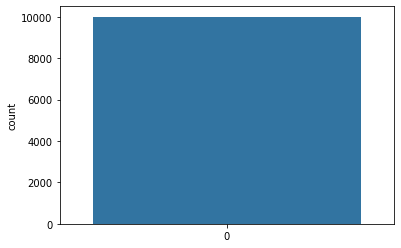

In [37]:
sns.countplot(data_file.Age)

In [33]:
data_file.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


array([[<AxesSubplot:title={'center':'CreditScore'}>]], dtype=object)

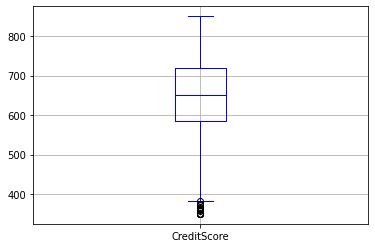

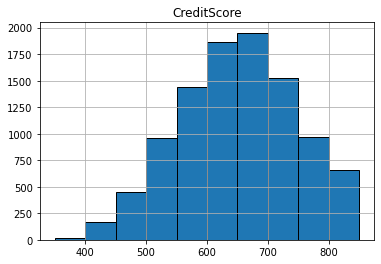

In [32]:
data_file.boxplot(column=['CreditScore'], grid='False', color='blue')
data_file.hist(column=['CreditScore'],grid='False', edgecolor='black')

In [31]:
print(data_file['CreditScore'].mean())
print(data_file['CreditScore'].median())
print(data_file['CreditScore'].std())

650.5288
652.0
96.65329873613035


In [30]:
data_file['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

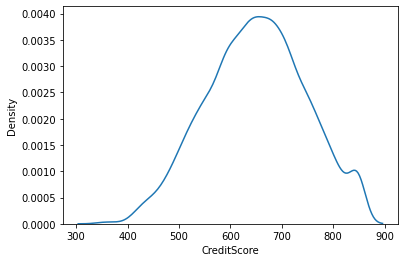

In [29]:
sns.kdeplot(data_file['CreditScore'])

**BIVARIATE ANALYSIS**

In [27]:
data_file[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].corr()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,1.000000


<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

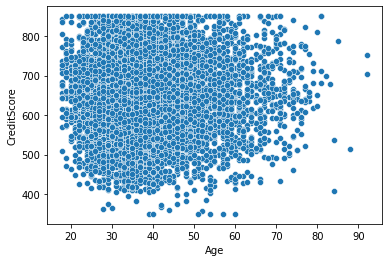

In [42]:
#sns.scatterplot(data_file.Age,data_file.CreditScore)
sns.scatterplot(x=data_file.Age,y=data_file.CreditScore)

In [25]:
data_file.groupby(by='HasCrCard').agg('mean')[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]

,CreditScore,Age,Tenure,Balance,EstimatedSalary
HasCrCard,,,,,
0,651.345331,39.112054,4.911715,77920.787552,100974.397711
1,650.187952,38.842381,5.054996,75886.913330,99721.161949


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

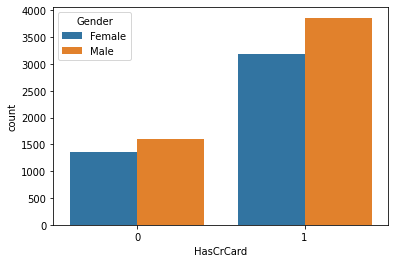

In [24]:
sns.countplot(data=data_file,x='HasCrCard',hue='Gender')

In [23]:
pd.crosstab(data_file.Gender,data_file.HasCrCard)

HasCrCard,0,1
Gender,,
Female,1351,3192
Male,1594,3863


**MULTIVARIATE ANALYSIS**

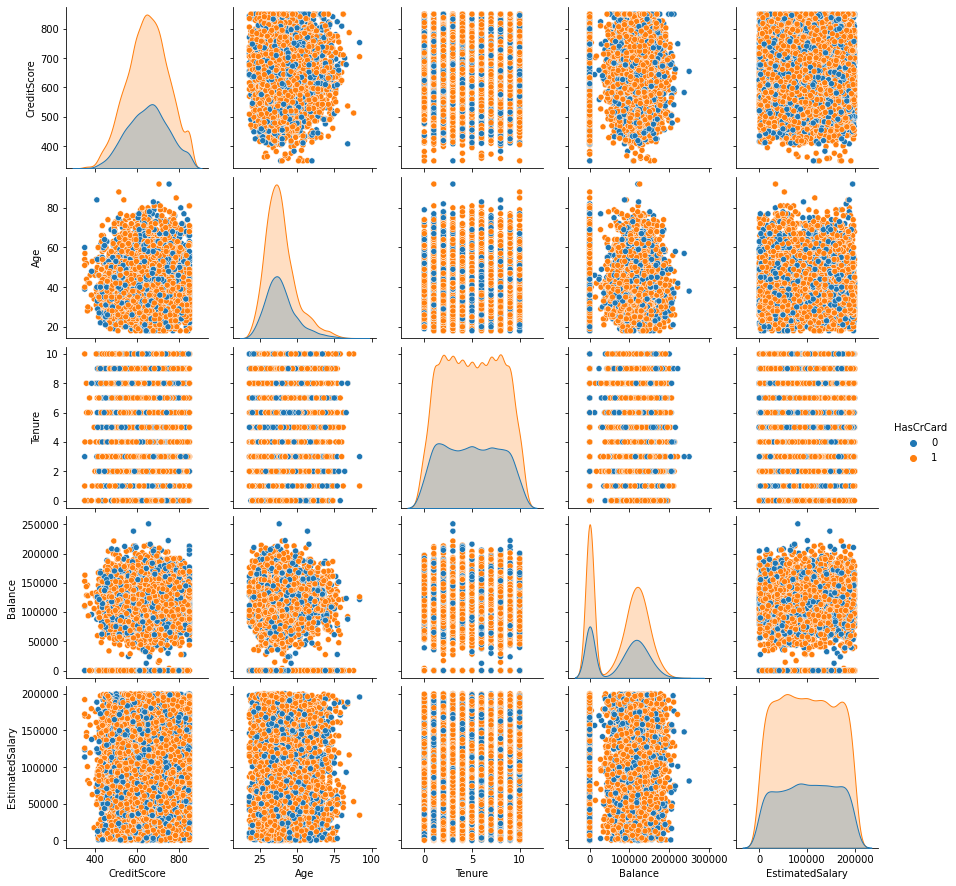

In [22]:
sns.pairplot(data=data_file[['CreditScore','Age','Tenure','Balance','EstimatedSalary','HasCrCard']],hue='HasCrCard')

**DESCRIPTIVE STATISTICS**

In [21]:
data_file.sum()

RowNumber                                                   50005000
CustomerId                                              156909405694
Surname            HargraveHillOnioBoniMitchellChuBartlettObinnaH...
CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                 764858892.88
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                        1000902398.81
Exited                                                          2037
dtype: object

In [20]:
print(data_file.count())


RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64


In [19]:
print(data_file.mode())

      RowNumber  CustomerId Surname  CreditScore Geography Gender   Age  \
0             1    15565701   Smith        850.0    France   Male  37.0   
1             2    15565706     NaN          NaN       NaN    NaN   NaN   
2             3    15565714     NaN          NaN       NaN    NaN   NaN   
3             4    15565779     NaN          NaN       NaN    NaN   NaN   
4             5    15565796     NaN          NaN       NaN    NaN   NaN   
...         ...         ...     ...          ...       ...    ...   ...   
9995       9996    15815628     NaN          NaN       NaN    NaN   NaN   
9996       9997    15815645     NaN          NaN       NaN    NaN   NaN   
9997       9998    15815656     NaN          NaN       NaN    NaN   NaN   
9998       9999    15815660     NaN          NaN       NaN    NaN   NaN   
9999      10000    15815690     NaN          NaN       NaN    NaN   NaN   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2.0      0.0           

In [18]:
print(data_file.min())


RowNumber                 1
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure                    0
Balance                 0.0
NumOfProducts             1
HasCrCard                 0
IsActiveMember            0
EstimatedSalary       11.58
Exited                    0
dtype: object


In [17]:
print(data_file.max())

RowNumber              10000
CustomerId          15815690
Surname               Zuyeva
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            250898.09
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199992.48
Exited                     1
dtype: object


In [16]:
print(data_file['CreditScore'].abs())

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64


In [15]:
print(data_file['Tenure'].cumsum())

0           2
1           3
2          11
3          12
4          14
        ...  
9995    50104
9996    50114
9997    50121
9998    50124
9999    50128
Name: Tenure, Length: 10000, dtype: int64


In [14]:
print(data_file['Tenure'].cumprod())

0        2
1        2
2       16
3       16
4       32
        ..
9995     0
9996     0
9997     0
9998     0
9999     0
Name: Tenure, Length: 10000, dtype: int64


In [13]:
print(data_file['Tenure'].prod())

0


In [12]:
data_file.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [11]:
print(data_file.describe(include='object'))

       Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457


In [10]:
print(data_file.describe(include='number'))

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

**HANDLE MISSING VALUES**

In [43]:
data_file.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
a=pd.isnull(data_file['Tenure'])
print(a)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Tenure, Length: 10000, dtype: bool


In [45]:
x=data_file.fillna(0)
y=data_file.fillna(method='pad')
z=data_file.fillna(method='bfill')
print(x,y,z)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

**HANDLING OUTLIERS**

<AxesSubplot:>

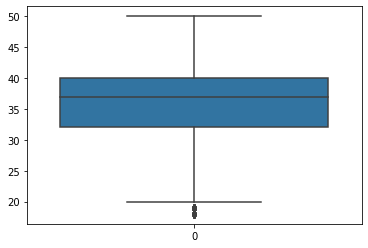

In [46]:
data_file2=data_file
median = data_file2.loc[y['Age']<100, 'Age'].median()
data_file2.loc[y.Age > 50, 'Age'] = np.nan
data_file2.fillna(median,inplace=True)
sns.boxplot(data_file2.Age)

In [47]:
data_file.skew()

C:\Users\tensi\AppData\Local\Temp\ipykernel_5648\3871501027.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_file.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age               -0.131141
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

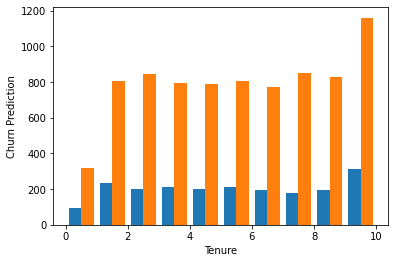

In [48]:
data_file3=data_file[data_file.Exited == 1].Tenure
data_file4=data_file[data_file.Exited == 0].Tenure
plt.xlabel("Tenure")
plt.ylabel("Churn Prediction")
plt.hist([data_file3,data_file4])
plt.show()

In [49]:
a=data_file.iloc[:,3:13].values      #Independent Variables
b=data_file.iloc[:,13:14].values   #Dependant Variables


In [50]:
ct=ColumnTransformer([("oh",OneHotEncoder(),[1,2])],remainder="passthrough")
a=ct.fit_transform(a)

In [51]:
data_file["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [52]:
data_file["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [53]:
import joblib
joblib.dump(ct,"churnct.pkl")

['churnct.pkl']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(a,b,test_size=0.2,random_state=0)

In [55]:
x_train.shape

(8000, 13)

In [56]:
x_test.shape

(2000, 13)

In [58]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
joblib.dump(sc,"churndc.pkl")

['churndc.pkl']